# How-To-Guide für machinelearning mit Scikit-learn

In diesem Beispiel benutzen wir den weltbekannten Iris Testsatz um anhand von anatomischen Eigenschaften 3 Pflanzenarten voneinander zu unterscheiden. Dazu laden wir zuerst alle Abhängikeiten und Datensätze in unser Notebook.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

In [3]:
iris = load_iris()
print("Anzahl der Rohdaten: ",len(iris.data))
print("Anzahl der Labels: ",len(iris.target))

Anzahl der Rohdaten:  150
Anzahl der Labels:  150


Wie man sieht besitzt unser Datensatz nun genau 150 Elemente. Dabei sind 3 Features jeweils einem Label (Pflanzenart) zugerodnet. Für eine besser Aufschlüsselung der Feature siehe Beispiel unten:

In [4]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Als nächstes geben wir den ersten Datensatz aus.

In [5]:
print(iris.data[0])
print(iris.target[0])

[ 5.1  3.5  1.4  0.2]
0


Um nun den Algorithmen an unbekannten Werten zu testen, werden 3 Werte aus unserer Wertetabelle zum Trainieren gelöscht und dienen später als Testdaten. 

In [6]:
test_idx = [0,50,100]
# training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

# testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

Als Learnalgorithmus kommt der DecisionTreeClassifier zum Einsatz.
Der Algorithmus wird nun mit den Testdaten trainiert.

In [7]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Anschließend soll eine Vorhersage über die Testdaten gefällt werden. Wie zusehen ist, hat er das Ergebnis gefunden. Wichtig hierbei ist der Score. Dieser liegt bei 1.0, was bedeutet, dass unser Testsatz sehr genau ist und eine Identifizierung eindeutig stattfinden kann.

In [8]:
print("Gegebene Label: ",test_target)
print("Vorhersehung: ",clf.predict(test_data))
print("Genauigkeit (Score): ",clf.score(train_data,train_target))

Gegebene Label:  [0 1 2]
Vorhersehung:  [0 1 2]
Genauigkeit (Score):  1.0


Anschließend wird der Algorithmus an einer Messung geprüft, welche nicht in der Standardtabelle enthalten ist.

In [9]:
neuerMesswert = np.array([5.0, 3.3, 1.4, 0.3]).reshape(1,-1)
print(iris.target_names[clf.predict(neuerMesswert)])

['setosa']


Die Pflanze konnte ohne Probleme identifieziert werden.

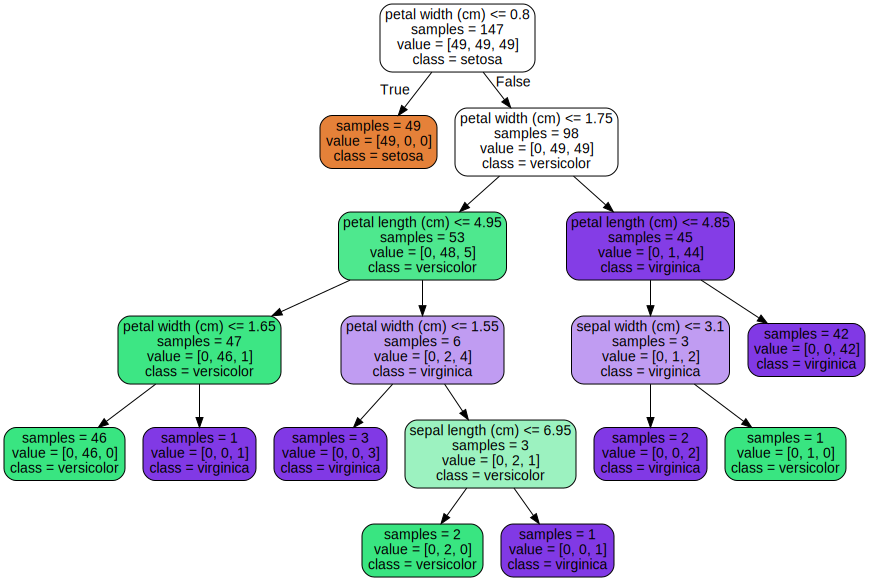

In [11]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(clf, 
                out_file="decisiontree.dot",
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                filled=True,
                rounded=True,
                impurity=False )
with open("decisiontree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

That is all folks!!!